In [1]:
#libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Dell/Downloads/car.csv")
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')


In [4]:
print(df.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [5]:
#number of entries
num_entries = df.shape[0]
# Print the number of entries
print("Number of entries:", num_entries)

Number of entries: 398


In [6]:
df.isnull ()
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
# statistics
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


## Data Cleaning 

In [10]:
from sklearn.impute import KNNImputer

# Create a copy of the DataFrame for imputation
df_imputed = df.copy()

# Replace '?' values with NaN
df_imputed['Horsepower'] = df_imputed['Horsepower'].replace('?', pd.NA)

# Convert the "horsepower" column to numeric
df_imputed['Horsepower'] = pd.to_numeric(df_imputed['Horsepower'])

# Initialize the KNNImputer with desired parameters
imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors as per your dataset

# Perform the imputation
df_imputed['Horsepower'] = imputer.fit_transform(df_imputed[['Horsepower']])

# Round the imputed values to the nearest integer
df_imputed['Horsepower'] = df_imputed['Horsepower'].round().astype(int)

In [11]:
df.to_csv('car-cleaned.csv', index=False)

## Data Visualization 

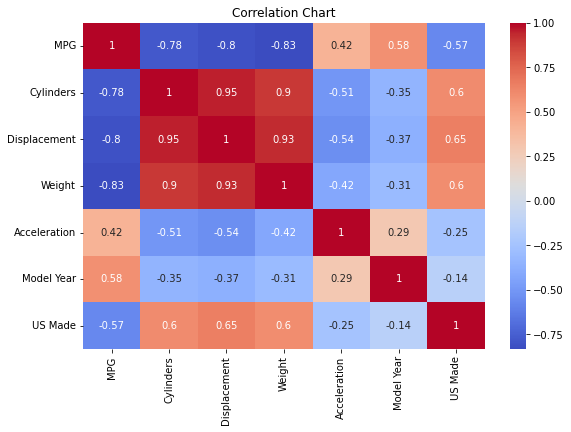

In [12]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Chart')
plt.show()

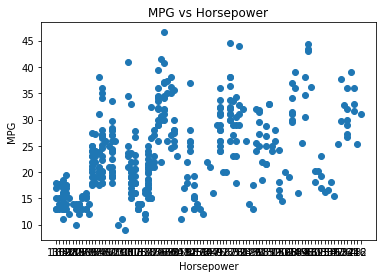

In [13]:
#scatter plot for relation between MPG and horsepower
plt.scatter(df['Horsepower'], df['MPG'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show() 

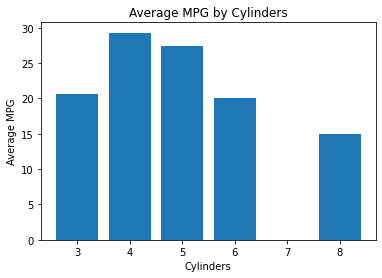

In [14]:
avg_mpg_by_cylinders = df.groupby('Cylinders')['MPG'].mean()
plt.bar(avg_mpg_by_cylinders.index, avg_mpg_by_cylinders.values)
plt.xlabel('Cylinders')
plt.ylabel('Average MPG')
plt.title('Average MPG by Cylinders')
plt.show()

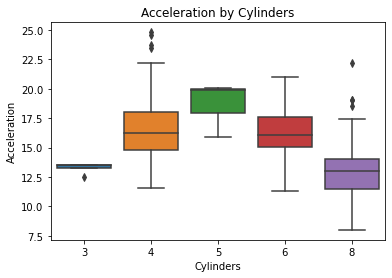

In [15]:
#distribution of a variable, such as Acceleration, based on the number of cylinders.
sns.boxplot(x='Cylinders', y='Acceleration', data=df)
plt.xlabel('Cylinders')
plt.ylabel('Acceleration')
plt.title('Acceleration by Cylinders')
plt.show()

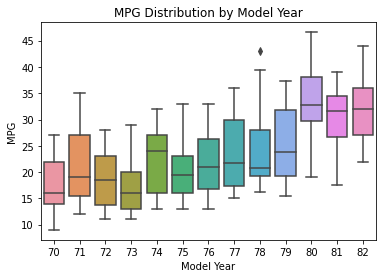

In [16]:
# Compare the distribution of MPG for different Model Years.
sns.boxplot(x='Model Year', y='MPG', data=df)
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('MPG Distribution by Model Year')
plt.show()

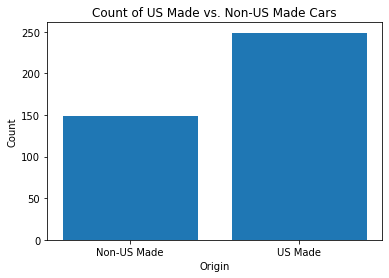

In [17]:
#US-made cars vs. non-US-made cars.
car_origin_counts = df['US Made'].value_counts()
plt.bar(car_origin_counts.index, car_origin_counts.values)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count of US Made vs. Non-US Made Cars')
plt.xticks(car_origin_counts.index, ['US Made', 'Non-US Made'])
plt.show()

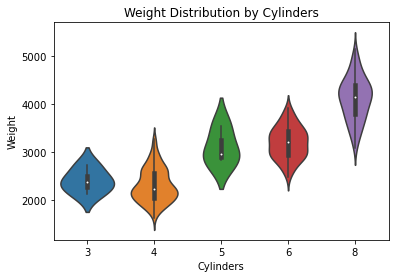

In [18]:
#Analyze the distribution of Weight based on the number of cylinders.
sns.violinplot(x='Cylinders', y='Weight', data=df)
plt.xlabel('Cylinders')
plt.ylabel('Weight')
plt.title('Weight Distribution by Cylinders')
plt.show()

## Models

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into the features (X) and the target variable (y)
df = df.replace('?', pd.NA)

# Convert the column to numeric
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

# Drop rows with missing values
df = df.dropna()
    
X = df.drop('MPG', axis=1)
y = df['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')

# Analyze the coefficients of the linear regression model
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print('\nCoefficient Values:')
print(coefficients)

Mean Squared Error (MSE): 10.60
Coefficient of Determination (R^2): 0.79

Coefficient Values:
Model Year      0.802775
Acceleration    0.044114
Displacement    0.019404
Weight         -0.006498
Horsepower     -0.020837
Cylinders      -0.331130
US Made        -3.058007
dtype: float64


In [20]:
import statsmodels.api as sm
from statistics import mode
mode= sm.add_constant(X_train)
mode

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
260,1.0,6,225.0,110.0,3620,18.7,78,1
184,1.0,4,140.0,92.0,2572,14.9,76,1
174,1.0,6,171.0,97.0,2984,14.5,75,1
64,1.0,8,318.0,150.0,4135,13.5,72,1
344,1.0,4,86.0,64.0,1875,16.4,81,1
...,...,...,...,...,...,...,...,...
72,1.0,8,304.0,150.0,3892,12.5,72,1
107,1.0,6,232.0,100.0,2789,15.0,73,1
272,1.0,4,151.0,85.0,2855,17.6,78,1
352,1.0,4,98.0,65.0,2380,20.7,81,1


In [21]:
b = sm.add_constant(X_train)
mode = sm.OLS(y_train, b).fit()
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          8.98e-113
Time:                        15:49:43   Log-Likelihood:                -816.80
No. Observations:                 313   AIC:                             1650.
Df Residuals:                     305   BIC:                             1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6855      5.319     -3.137   

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Backward Technique for model optimization

In [35]:
import statsmodels.api as sm

# Perform backward elimination
def backward_elimination(X, y, threshold_out):
    features = list(X.columns)
    while True:
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        if max_p_value > threshold_out:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            X = X.drop(excluded_feature, axis=1)
        else:
            break
    return features

# Split the dataset into the features (X) and the target variable (y)
# ... (code for data preprocessing and train-test split)

# Perform backward elimination
selected_features = backward_elimination(X_train, y_train, threshold_out=0.05)

# Create and fit the linear regression model using selected features
model_backward = LinearRegression()
model_backward.fit(X_train[selected_features], y_train)

# Make predictions on the test set using backward elimination model
y_pred_backward = model_backward.predict(X_test[selected_features])

# Calculate the model's performance metrics for backward elimination
mse_backward = mean_squared_error(y_test, y_pred_backward)
r2_backward = r2_score(y_test, y_pred_backward)

# Create and fit the linear regression model using all features
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test set using linear regression model
y_pred_lr = model_lr.predict(X_test)

# Calculate the model's performance metrics for linear regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Compare the performance metrics of the two models
print(f'Backward Elimination Model: MSE = {mse_backward:.2f}, R^2 = {r2_backward:.2f}')
print(f'Linear Regression Model: MSE = {mse_lr:.2f}, R^2 = {r2_lr:.2f}')

Backward Elimination Model: MSE = 10.84, R^2 = 0.79
Linear Regression Model: MSE = 10.60, R^2 = 0.79


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
